In [19]:
# importation des librairy

import pandas as pd
from datetime import date
import os
from skimpy import skim
import missingno as msno
import matplotlib.pyplot as plt

## lecture des csv

### read des csv statiques

In [2]:
df_aeronefs = pd.read_csv('dataset/aeronefs_2024-06-02.csv')
df_composants = pd.read_csv('dataset/composants_2024-06-02.csv')

### lecture et mise à jour des csv dynamiques

In [3]:
# récupération date du jour
aujourdhui = date.today()
aujourdhui = aujourdhui.strftime('%Y-%m-%d')

In [4]:
# lecture des logs ancien et nouveau
df_logs_old = pd.read_csv('dataset/logs_vols.csv')

df_logs_new = pd.read_csv(f'http://sc-e.fr/docs/logs_vols_{aujourdhui}.csv')

In [5]:
# concatenation des 2 df puis suppression des doublons
df_logs_concat = pd.concat([df_logs_old, df_logs_new], axis= 1)

df_logs = df_logs_concat.drop_duplicates()

In [6]:
# suppression des df inutiles
del df_logs_concat, df_logs_old, df_logs_new

In [7]:
# suppression de l'ancien csv
chemin_csv = 'dataset/logs_vols.csv'

if os.path.exists(chemin_csv):
    os.remove(chemin_csv)
    print(f"Le fichier {chemin_csv} a été supprimé")
else:
    print(f"Le fichier {chemin_csv} n'existe pas.")

Le fichier dataset/logs_vols.csv a été supprimé


In [8]:
# enregistrement des nouvelles données dans le csv
df_logs.to_csv('dataset/logs_vols.csv')

In [9]:
df_degradations_old = pd.read_csv('dataset/degradations.csv')

df_degradations_new = pd.read_csv(f'http://sc-e.fr/docs/degradations_{aujourdhui}.csv')

In [10]:
# concatenation des 2 df puis suppression des doublons
df_degradations_concat = pd.concat([df_degradations_old, df_degradations_new], axis= 1)

df_degradations = df_degradations_concat.drop_duplicates()

In [11]:
# suppression des df inutiles
del df_degradations_concat, df_degradations_old, df_degradations_new

In [12]:
# suppression de l'ancien csv
chemin_csv = 'dataset/degradations.csv'

if os.path.exists(chemin_csv):
    os.remove(chemin_csv)
    print(f"Le fichier {chemin_csv} a été supprimé")
else:
    print(f"Le fichier {chemin_csv} n'existe pas.")

Le fichier dataset/degradations.csv a été supprimé


In [13]:
# enregistrement des nouvelles données dans le csv
df_degradations.to_csv('dataset/degradations.csv')

## Nettoyage des df

In [14]:
df_aeronefs.head()

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
0,E170_6353,E170,2000-03-17,2024-03-27 00:00:00,False,NaN
1,B767_2803,B767,2020-12-03,2024-06-01 00:00:00,False,NaN
2,CRJ700_6943,CRJ700,2015-01-29,2024-06-02,True,2024-06-03 14:13:00
3,A350_1177,A350,2005-08-07,2024-01-04 00:00:00,False,NaN
4,B777_4029,B777,2009-01-01,2024-06-01 00:00:00,False,NaN


In [15]:
# info sur le df
skim(df_aeronefs)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 232    │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 6      │ │ bool        │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                             ┃ true           ┃ true rate                  ┃ hist               ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ en_maintenance                          │             15 │                      0.065 │       ▇    ▁       │  │
│ └─────────────────────────────────────────┴────────────────┴────────────────────────────┴────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                 ┃ NA       ┃ NA %        ┃ words per row              ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ ref_aero                    │        0 │           0 │                          1 │                    232 │  │
│ │ type_model                  │        0 │           0 │                          1 │                    232 │  │
│ │ debut_service               │        0 │           0 │                          1 │                    232 │  │
│ │ last_maint                  │        0 │           0 │                        1.9 │                    449 │  │
│ │ end_maint                   │      217 │       93.53 │                       0.13 │                     30 │  │
│ └─────────────────────────────┴──────────┴─────────────┴────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [16]:
df_aeronefs.nunique()

ref_aero          231
type_model         15
debut_service     227
last_maint         79
en_maintenance      2
end_maint           2
dtype: int64

In [75]:
# recherche du doublon de ref_aero et l'afficher.
duplicates = df_aeronefs[df_aeronefs.duplicated(subset='ref_aero', keep=False)]
print("Doublons basés sur la colonne 'ref_aero':")

duplicates

Doublons basés sur la colonne 'ref_aero':


,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
40,E170_5551,E170,2017-02-07,2024-06-01 00:00:00,False,NaN
230,E170_5551,E170,2021-04-10,2024-06-01 00:00:00,False,NaN


In [ ]:
# renommer les ref_aero si doublons ? 
--> si ref_aero est reference après

In [64]:
# observation des valeurs null par colonne
cols = df_aeronefs.columns

for col in cols:
    if len(df_aeronefs[df_aeronefs[col].isna()]) == 0:
        print(f'col : {col} ok plein')
    else:
        print()
        print(f'col : {col} avec des null')

col : ref_aero ok plein
col : type_model ok plein
col : debut_service ok plein
col : last_maint ok plein
col : en_maintenance ok plein

col : end_maint avec des null


<Axes: >

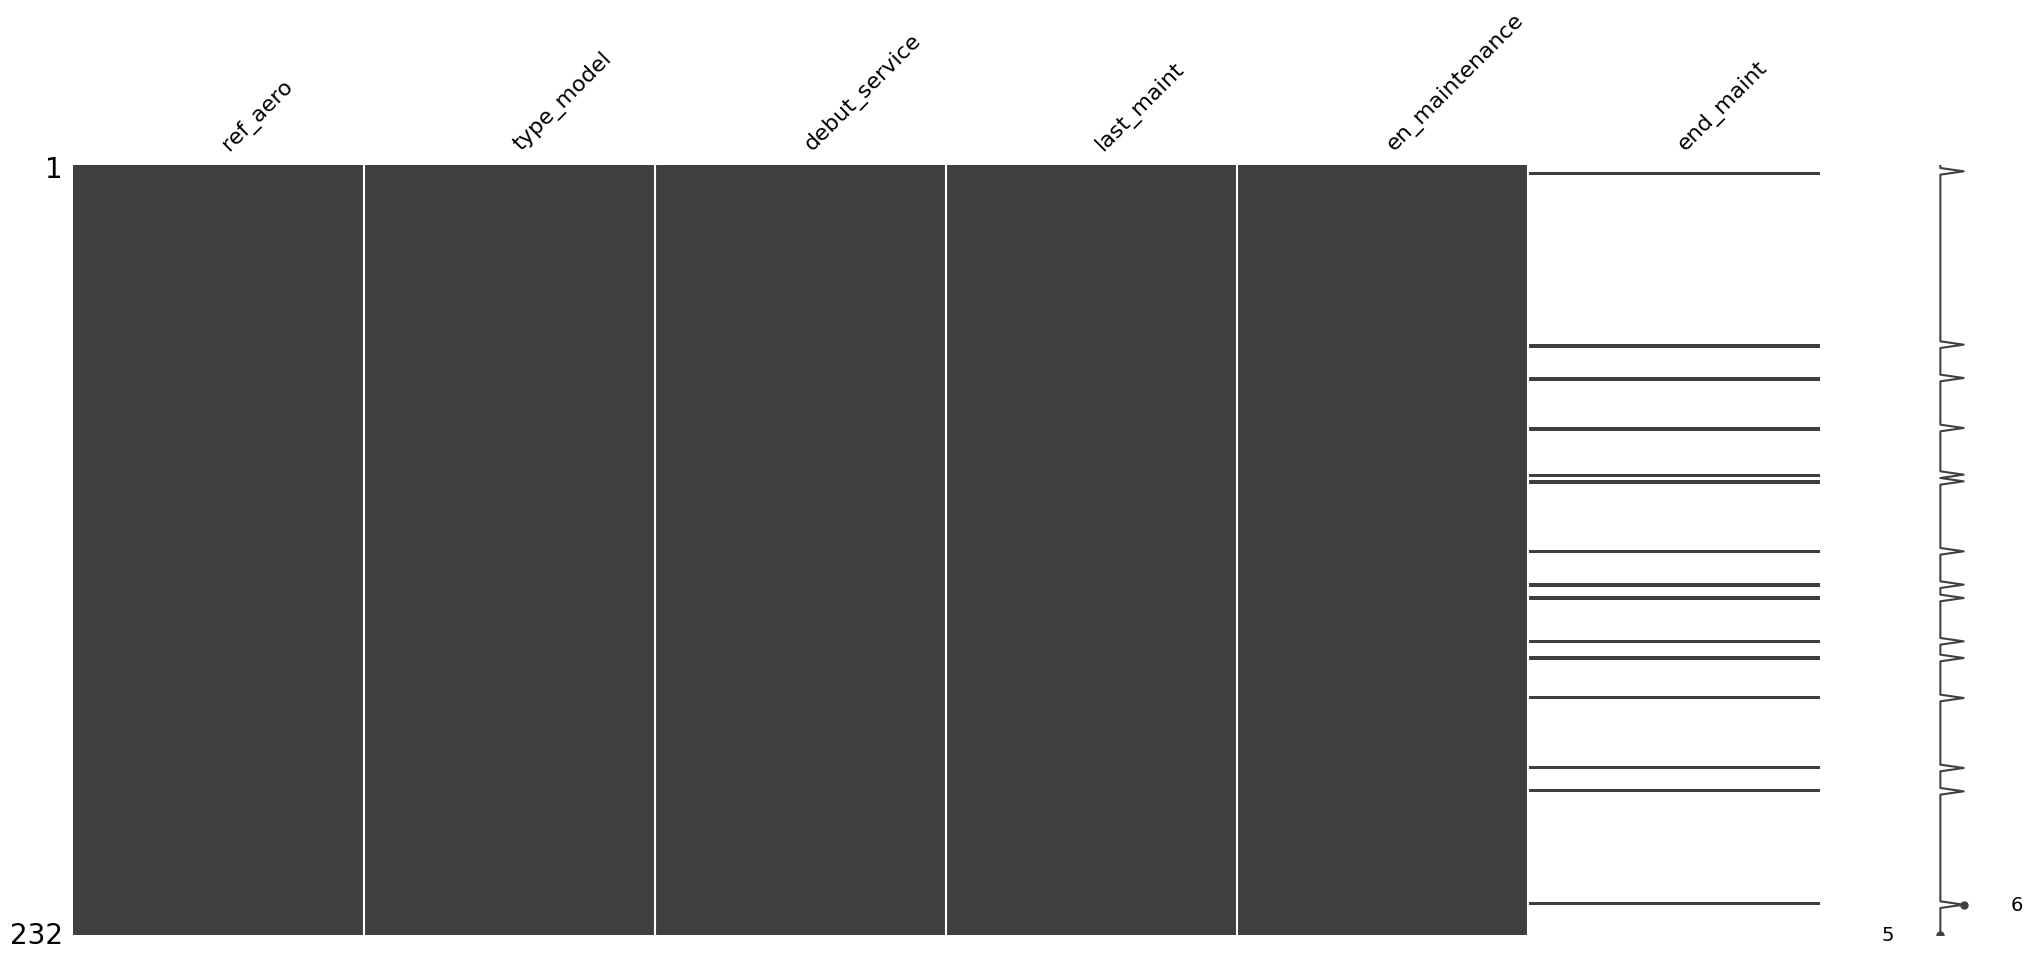

In [25]:
msno.matrix(df_aeronefs)

In [72]:
# vérification si avion en maintenance alors date de prevision de fin de maintenance et inverse vrai

df_temp_en_maintenance_T = df_aeronefs[df_aeronefs['en_maintenance'] ==True]

df_temp_en_maintenance_T[df_temp_en_maintenance_T['end_maint'].isna()]

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint


In [73]:
df_temp_en_maintenance_F = df_aeronefs[df_aeronefs['en_maintenance'] == False]

df_temp_en_maintenance_F[~df_temp_en_maintenance_F['end_maint'].isna()]

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint


Conclusion sur les valuers Null de end_maintenance :
Si un avion est en maintence (True) alors il y a une date.
Si un avion n'est pas en maintenance alors le champ est null.

Il est potentielement possible de remplacer par la date du jour la fin de maintenance prévisionnel car ça signifie 0 jour jusqu'à la remise en service de l'appareil.